<a href="https://colab.research.google.com/github/ppotatoo/Capstone-Predictive-Modeling-for-Increasing-Adoption-Probability/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import pathlib

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤2_제주유기견/설문결과-Raw-Data.csv',sep=',')

In [ ]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','ls1','ls2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,ls1,ls2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [ ]:
real_df = df

In [ ]:
idx = real_df[df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [ ]:
old_range = {'경험':{2:0}, '인식매체':{2:0}, '입양희망여부' :{2:0}, '성별' : {2:0}, '犬성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자 , 인식매체 0 오프라인, 1 온라인,  경험 0 아니오, 1 예
logi_df = real_df.replace(old_range)
logi_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,ls1,ls2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,0,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,0,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,0,3,1,46,1,3,NaN
4,1,0,3,2,2,3,3,4,4,0,...,3,3,3,0,2,1,41,0,2,NaN
5,1,1,4,5,4,5,3,5,4,1,...,2,3,5,1,3,4,29,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,1,2,2,52,1,3,NaN
291,1,0,2,3,3,2,2,2,4,1,...,3,2,3,0,2,1,26,0,3,NaN
292,1,1,2,3,3,4,4,3,3,1,...,4,3,4,1,2,2,33,1,5,NaN
295,1,0,3,2,3,3,2,2,4,0,...,3,3,3,0,3,1,30,0,3,NaN


In [ ]:
df1 = logi_df.drop(['d5','d6'],axis = 1)

In [ ]:
df1['ls1'].unique()

array([4, 1, 3, 2])

In [ ]:
df1['ls1'].value_counts()

3    69
2    68
4    34
1    33
Name: ls1, dtype: int64

In [ ]:
df1['ls2'].value_counts()

1    98
2    81
4    15
3    10
Name: ls2, dtype: int64

In [ ]:
mom_df = df1.drop(['인식매체','경험','인식','관심도','지식','구성원동의','정부지원정책','犬성별','중성화','犬나이','털길이','품종','성격','공고기간','ls1','ls2'],axis=1)

In [ ]:
mom_df.describe()

,환경,비용지불의사,색상,크기,입양희망여부,조사 나이대,성별
count,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000
mean,2.774510,3.147059,3.455882,2.852941,0.50000,41.264706,0.485294
std,1.152482,1.198497,0.894986,1.077280,0.50123,10.443775,0.501013
min,1.000000,1.000000,1.000000,1.000000,0.00000,19.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,0.00000,33.750000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,0.50000,40.500000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,1.00000,49.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,1.00000,68.000000,1.000000


In [ ]:
data_1 = mom_df.drop(['크기','색상'],axis = 1)

In [ ]:
g1 = data_1.loc[df['ls1'] == 1] #1그룹  , 여가가치 투자형
g2 = data_1.loc[df['ls1'] == 2] #2그룹  , 개인여가 지향형
g3 = data_1.loc[df['ls1'] == 3] #3그룹  , 가족 중심 여가추구형
g4 = data_1.loc[df['ls1'] == 4] #4그룹  , 여가 갈망형

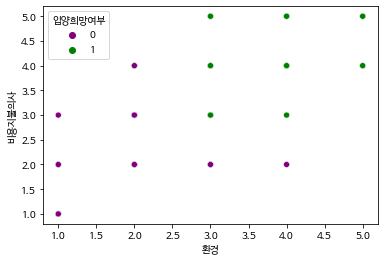

In [ ]:
sns.scatterplot(x='환경', y='비용지불의사', hue='입양희망여부',
                palette=['purple', 'green'], data=g3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b92f1de80>,
      dtype=object)

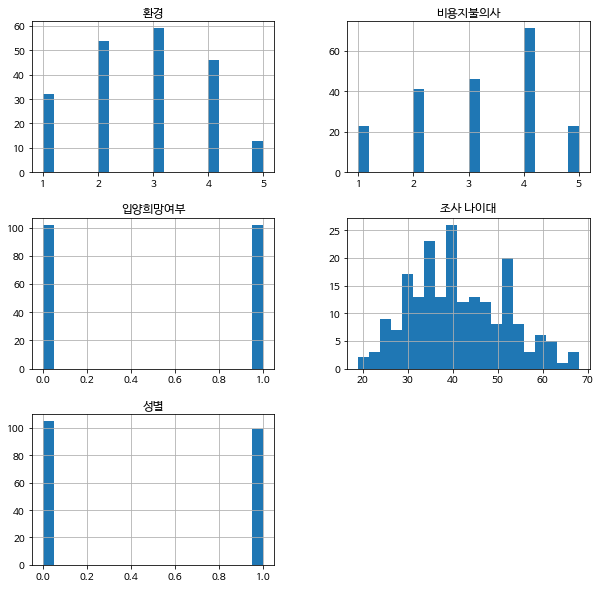

In [ ]:
data_1.hist(bins=20, figsize=(10,10))

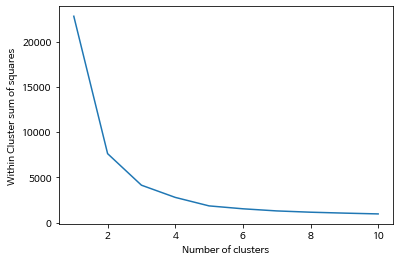

In [ ]:
from sklearn.cluster import KMeans # elbow값 찾아서 클러스터 중심 값 찾으려고 했음
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares')
plt.show()

Text(28.74123263888889, 0.5, '비용지불의사')

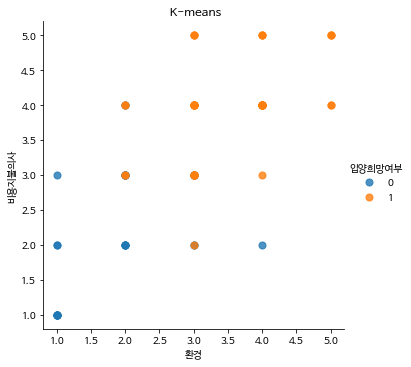

In [ ]:
sns.lmplot(x='환경', y='비용지불의사', data=g3, fit_reg=False, scatter_kws={"s": 50},hue='입양희망여부')
plt.title(' K-means')
plt.xlabel('환경')
plt.ylabel('비용지불의사')

In [ ]:
points = g3.values
kmeans = KMeans(n_clusters=3).fit(points)
# 각 클러스터들의 중심 위치 구할 수 있게 하기
kmeans.cluster_centers_

array([[ 3.11111111,  3.51851852,  0.62962963, 55.18518519,  0.59259259],
       [ 2.82352941,  3.17647059,  0.52941176, 30.94117647,  0.17647059],
       [ 2.64      ,  3.08      ,  0.52      , 42.24      ,  0.56      ]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' K-means Clustering')

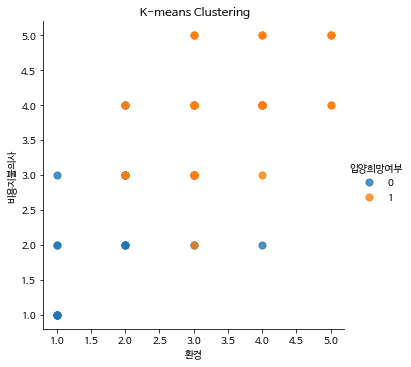

In [ ]:
sns.lmplot('환경', '비용지불의사', data=g3, fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')
plt.title(' K-means Clustering')